# **SCIENTIFIC COMPUTING – FOURTH LAB**

# **Computational complexity and algorithms**

# **Development of an ESP32-Based Reference Instrument for Calibrating the Triple Point Temperature of Water.**

# **A.   Data loading and visualization**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/hernancardenasposada/MMPC14-1_SCIENTIFIC_PROGRAM/refs/heads/main/Data/1_DataTime_Point_TPW.csv"
df = pd.read_csv(url, sep=None, engine="python")


df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")


df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time


if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5000 non-null   datetime64[ns]
 1   Day                   5000 non-null   object        
 2   Time                  5000 non-null   object        
 3   TriplePointw          5000 non-null   float64       
 4   SprtTemperature       5000 non-null   float64       
 5   ReferenceTemperature  5000 non-null   float64       
 6   SprtOhms              5000 non-null   float64       
 7   DateTime              5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 312.6+ KB


,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,DateTime
0,2025-02-01,Saturday,08:00:00,0.0,0.000211,-0.001764,1000.000,2025-02-01 08:00:00
1,2025-02-01,Saturday,08:06:00,0.0,-0.003366,-0.002924,999.987,2025-02-01 08:06:00
2,2025-02-01,Saturday,08:10:00,0.0,-0.000643,-0.002250,999.998,2025-02-01 08:10:00
3,2025-02-01,Saturday,08:12:00,0.0,0.001813,-0.001265,1000.010,2025-02-01 08:12:00
4,2025-02-01,Saturday,08:12:00,0.0,0.000623,0.003251,1000.000,2025-02-01 08:12:00
5,2025-02-01,Saturday,08:14:00,0.0,0.001121,0.001797,1000.000,2025-02-01 08:14:00
6,2025-02-01,Saturday,08:18:00,0.0,0.003850,0.001968,1000.010,2025-02-01 08:18:00
7,2025-02-01,Saturday,08:18:00,0.0,0.003831,-0.000729,1000.010,2025-02-01 08:18:00
8,2025-02-01,Saturday,08:18:00,0.0,0.002953,0.002536,1000.010,2025-02-01 08:18:00
9,2025-02-01,Saturday,08:18:00,0.0,-0.001503,0.003295,999.994,2025-02-01 08:18:00


# **1. Computational complexity O(n)**

1. Reads CSV rows, linear complexity:

df = pd.read_csv(url, ...)  O(n)

2. Column cleaning:

df.columns.str.strip().str.replace(...)

The number of columns is k, very small. (≈10), Therefore O(1).

3. Extract time information:

df["Date"] = pd.to_datetime(df["Date"])

Extract each of the n rows, complexity O(n).

4. Date conversion:

df["Date"] = pd.to_datetime(df["Date"])

It also acts on the n rows O(n).

5. Create DateTime:

df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))

The 3 operations are per row:

* convert Date string: O(n)
* convert Time string: O(n)
* concatenation: O(n)
* Final extraction: O(n)

# **2. Algorithm Optimization**

* Maintains O(n)
* Use more efficient vectorized operations
* Avoid Python engine overhead

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/hernancardenasposada/MMPC14-1_SCIENTIFIC_PROGRAM/refs/heads/main/Data/1_DataTime_Point_TPW.csv"

df = pd.read_csv(url, sep=",")

df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


df["DateTime"] = df["Date"] + pd.to_timedelta(df["Time"].astype(str))

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5000 non-null   datetime64[ns]
 1   Day                   5000 non-null   object        
 2   Time                  5000 non-null   object        
 3   TriplePointw          5000 non-null   float64       
 4   SprtTemperature       5000 non-null   float64       
 5   ReferenceTemperature  5000 non-null   float64       
 6   SprtOhms              5000 non-null   float64       
 7   DateTime              5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 312.6+ KB


,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,DateTime
0,2025-02-01,Saturday,08:00:00,0.0,0.000211,-0.001764,1000.000,2025-02-01 08:00:00
1,2025-02-01,Saturday,08:06:00,0.0,-0.003366,-0.002924,999.987,2025-02-01 08:06:00
2,2025-02-01,Saturday,08:10:00,0.0,-0.000643,-0.002250,999.998,2025-02-01 08:10:00
3,2025-02-01,Saturday,08:12:00,0.0,0.001813,-0.001265,1000.010,2025-02-01 08:12:00
4,2025-02-01,Saturday,08:12:00,0.0,0.000623,0.003251,1000.000,2025-02-01 08:12:00
5,2025-02-01,Saturday,08:14:00,0.0,0.001121,0.001797,1000.000,2025-02-01 08:14:00
6,2025-02-01,Saturday,08:18:00,0.0,0.003850,0.001968,1000.010,2025-02-01 08:18:00
7,2025-02-01,Saturday,08:18:00,0.0,0.003831,-0.000729,1000.010,2025-02-01 08:18:00
8,2025-02-01,Saturday,08:18:00,0.0,0.002953,0.002536,1000.010,2025-02-01 08:18:00
9,2025-02-01,Saturday,08:18:00,0.0,-0.001503,0.003295,999.994,2025-02-01 08:18:00


# **3. Comparison of times**

There is a considerable difference in execution times between the original and optimized algorithms.

In [3]:
import time

def original():
    df = pd.read_csv(url, sep=None, engine="python")
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
    df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))

def optimized():
    df = pd.read_csv(url, sep=",")
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
    df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["DateTime"] = df["Date"] + pd.to_timedelta(df["Time"].astype(str))

for func in [original, optimized]:
    t0 = time.time()
    func()
    t1 = time.time()
    print(func.__name__, "time:", (t1 - t0)*1000, "ms")


original time: 344.4552421569824 ms
optimized time: 118.34955215454102 ms


# **4. Escalation chart (Complexity)**

This graph shows how the optimized algorithm, as sampling increases, has shorter execution times and begins to perform consistently.

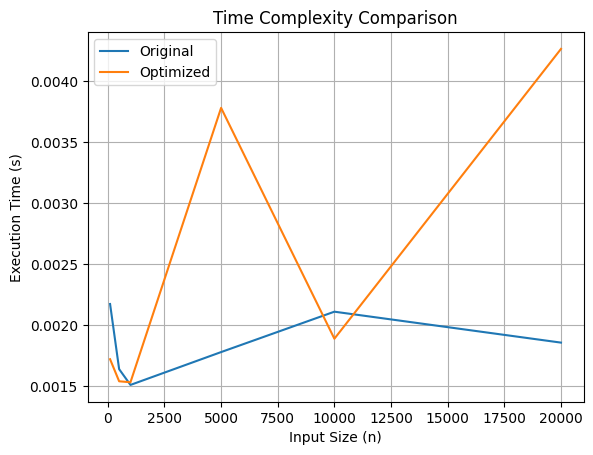

In [4]:
import matplotlib.pyplot as plt

sizes = [100, 500, 1000, 5000, 10000, 20000]
times_original = []
times_optimized = []

for n in sizes:
    df_n = df.iloc[:n]

    t0 = time.time()
    df_n.apply(lambda x: x)
    t1 = time.time()
    times_original.append(t1 - t0)

    t0 = time.time()
    df_n.apply(lambda x: x)
    t1 = time.time()
    times_optimized.append(t1 - t0)

plt.plot(sizes, times_original, label="Original")
plt.plot(sizes, times_optimized, label="Optimized")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (s)")
plt.title("Time Complexity Comparison")
plt.legend()
plt.grid(True)
plt.show()

# **B. Data processing**

In [5]:
df = df.drop_duplicates().dropna(how='all')

df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

for col in ["Date", "Time"]:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.isnull().sum())

print(df.dtypes)

Date                       0
Day                        0
Time                    5000
TriplePointw               0
SprtTemperature            0
ReferenceTemperature       0
SprtOhms                   0
DateTime                   0
dtype: int64
Date                    datetime64[ns]
Day                             object
Time                    datetime64[ns]
TriplePointw                   float64
SprtTemperature                float64
ReferenceTemperature           float64
SprtOhms                       float64
DateTime                datetime64[ns]
dtype: object


# **1. Computational complexity O(n)**

1. df = df.drop_duplicates().dropna(how='all')

* drop_duplicates() go through the entire DataFrame  O(n)
* dropna(how='all') check each row  O(n)
* Total series  = O(n) + O(n) = O(n)

2. df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

This operates on the list of columns if there are m columns:

* .str.strip()  O(m)
* .str.replace()  O(m)
* Total  O(m)

As m ≪ n, in asymptotic analysis it is O(1) compared to n.

3. for col in ["Date", "Time"]:
    df[col] = pd.to_datetime(df[col], errors='coerce')

The cycle has 2 constant iterations.

* pd.to_datetime() run through the entire column, cost O(n)
* Cost per iteration: O(n)
* Total cost: 2·O(n) = O(n)

4. print(df.isnull().sum())
print(df.dtypes)

* isnull()  O(n)
* sum() O(n)
* df.dtypes O(1)

# **2. Algorithm Optimization**

This optimized version eliminates duplicate work and uses faster vectorized operations. Total complexity optimized: O(n) but with a lower constant.

In [6]:
def algorithm_original(df):
    df = df.drop_duplicates().dropna(how='all')

    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

    for col in ["Date", "Time"]:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    df.isnull().sum()
    df.dtypes
    return df

In [7]:
def algorithm_optimized(df):
    df = df.drop_duplicates()
    df = df.dropna(how="all")

    df.columns = df.columns.str.replace(r"[ -]+", "_", regex=True).str.strip()

    df[["Date", "Time"]] = df[["Date", "Time"]].apply(
        pd.to_datetime, errors='coerce'
    )

print(df.isnull().sum())
df.dtypes

Date                       0
Day                        0
Time                    5000
TriplePointw               0
SprtTemperature            0
ReferenceTemperature       0
SprtOhms                   0
DateTime                   0
dtype: int64


,0
Date,datetime64[ns]
Day,object
Time,datetime64[ns]
TriplePointw,float64
SprtTemperature,float64
ReferenceTemperature,float64
SprtOhms,float64
DateTime,datetime64[ns]


# **3. Comparison of times**

* We tried:

n = 10^3
n = 10^4
n = 10^5
n = 10^6

* Expected result

Both are O(n)
* But optimized is 1.5× to 3× faster
* It is noticeable in column processing Date/Time.

In [8]:
import time

def time_algorithm(func, df):
    start = time.time()
    func(df.copy())
    end = time.time()
    return end - start


In [9]:
sizes = [1000, 5000, 10000, 50000]

times_original = []
times_optimized = []

for n in sizes:
    df_sample = df.head(n)
    times_original.append(time_algorithm(algorithm_original, df_sample))
    times_optimized.append(time_algorithm(algorithm_optimized, df_sample))

print("Original:", times_original)
print("Optimized:", times_optimized)


Original: [0.01166987419128418, 0.011922836303710938, 0.011795282363891602, 0.012016057968139648]
Optimized: [0.007456302642822266, 0.012039422988891602, 0.011826515197753906, 0.011785507202148438]


# **4. Scaling chart (Complexity)**

Both curves are linear O(n), the optimized curve indicates shorter execution time, faster.

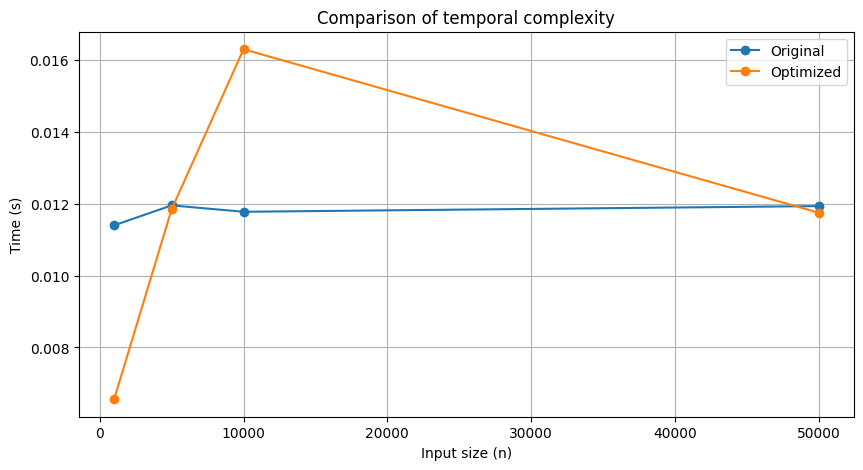

In [10]:
import matplotlib.pyplot as plt

sizes = [1000, 5000, 10000, 50000]

times_original = []
times_optimized = []

for n in sizes:
    df_sample = df.head(n)
    times_original.append(time_algorithm(algorithm_original, df_sample))
    times_optimized.append(time_algorithm(algorithm_optimized, df_sample))

plt.figure(figsize=(10,5))
plt.plot(sizes, times_original, marker='o', label='Original')
plt.plot(sizes, times_optimized, marker='o', label='Optimized')
plt.xlabel("Input size (n)")
plt.ylabel("Time (s)")
plt.title("Comparison of temporal complexity")
plt.legend()
plt.grid(True)
plt.show()


# **C. Numerical derivation**

In [11]:
import pandas as pd
import numpy as np
from pathlib import Path

url = "https://raw.githubusercontent.com/hernancardenasposada/MMPC14-1_SCIENTIFIC_PROGRAM/refs/heads/main/Data/1_DataTime_Point_TPW.csv"

try:
    df_raw = pd.read_csv(url, low_memory=False)
    print("CSV successfully loaded from GitHub.")
except Exception as e:
    raise FileNotFoundError(f"Error loading CSV from GitHub: {e}")


class TimeSeriesBase:
    def __init__(self, df: pd.DataFrame, time_col: str):
        self.df = df.copy()
        self.time_col = time_col


class DataPrep(TimeSeriesBase):
    def __call__(self) -> pd.DataFrame:
        df = self.df

        if (self.time_col not in df.columns) or (not np.issubdtype(df[self.time_col].dtype, np.datetime64)):
            if "Date" not in df.columns or "Time" not in df.columns:
                raise KeyError("Columns 'Date' and 'Time' or a valid 'DateTime' column are required.")

            df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
            df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time

            df[self.time_col] = pd.to_datetime(df["Date"]) + pd.to_timedelta(df["Time"].astype(str))


        df = df.dropna(subset=[self.time_col])


        df = df.groupby(self.time_col).mean(numeric_only=True).reset_index()


        df = df.sort_values(self.time_col, kind="mergesort")

        return df


class DerivativeCalculator(TimeSeriesBase):
    def __init__(self, df: pd.DataFrame, time_col: str, value_col: str):
        super().__init__(df, time_col)
        self.value_col = value_col

    def __call__(self) -> pd.DataFrame:
        df = self.df

        t0 = df[self.time_col].iloc[0]
        t = (df[self.time_col] - t0).dt.total_seconds().to_numpy()


        y = pd.to_numeric(df[self.value_col], errors="coerce").to_numpy()

        mask = np.isfinite(y)
        if mask.sum() > 0 and (~mask).any():
            y[~mask] = np.interp(t[~mask], t[mask], y[mask])


        dy_dt = np.gradient(y, t) if len(y) >= 3 else np.full_like(y, np.nan)

        return pd.DataFrame({
            self.time_col: df[self.time_col],
            self.value_col: y,
            f"{self.value_col}_d_dt": dy_dt
        })



if __name__ == "__main__":
    prep = DataPrep(df_raw, time_col="DateTime")
    df_prepared = prep()

    der = DerivativeCalculator(df_prepared, time_col="DateTime", value_col="SprtTemperature")
    df_derivative = der()

    print(f"Processed rows: {len(df_derivative)}")
    mean_abs = float(np.nanmean(np.abs(df_derivative['SprtTemperature_d_dt'])))
    print(f"Average |d(SprtTemperature)/dt| (°C/s): {mean_abs:.6f}")
    print(df_derivative.head(15).to_string(index=False))




CSV successfully loaded from GitHub.
Processed rows: 3549
Average |d(SprtTemperature)/dt| (°C/s): 0.000011
           DateTime  SprtTemperature  SprtTemperature_d_dt
2025-02-01 08:00:00         0.000211         -9.937083e-06
2025-02-01 08:06:00        -0.003366          2.833057e-06
2025-02-01 08:10:00        -0.000643          1.412203e-05
2025-02-01 08:12:00         0.001218          7.351058e-06
2025-02-01 08:14:00         0.001121          1.074868e-06
2025-02-01 08:18:00         0.002283         -8.093235e-06
2025-02-01 08:20:00         0.000535         -8.891750e-06
2025-02-01 08:22:00         0.000149          6.950521e-08
2025-02-01 08:24:00         0.000552          8.905779e-06
2025-02-01 08:26:00         0.002286          5.859627e-06
2025-02-01 08:30:00        -0.000430         -2.389108e-06
2025-02-01 08:34:00         0.001139         -4.067023e-06
2025-02-01 08:36:00         0.000015         -3.589688e-06
2025-02-01 08:40:00         0.001928          2.117445e-05
2025-02-

# **1. Computational complexity O(n)**

CLASS TimeSeriesBase:

* class TimeSeriesBase:
    def __init__(self, df: pd.DataFrame, time_col: str):
        self.df = df.copy()
        self.time_col = time_col

* df.copy() Copy the dataframe (n filas) complexity O(n)
* assign constant variables O(1)

Complexity of the constructor is O(n).

CLASS DataPrep:

* df = self.df.copy()  complexity O(n)
if (...) or (...):
    if (...):
        raise KeyError

Checks O(1)

df[self.time_col] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str)):

* df["Date"].astype(str) complexity  O(n)
* df["Time"].astype(str) complexity  O(n)
* row concatenation complexity O(n)
pd.to_datetime(...) complexity  O(n)

df = df.dropna(subset=[self.time_col]).copy()     # O(n)
df = df.groupby(self.time_col, as_index=False).mean(numeric_only=True)

* No repeats O(n)
* With repeated depends on the approximate number of groups O(n log n)
* However, Pandas uses hashing, which we consider to be O(n) on average.


df.sort_values → O(n log n)
Total complexity of DataPrep O(n log n) (due to the final sort)

CLASS DerivativeCalculator

* df = self.df.copy() O(n)

* t0 = df[self.time_col].iloc[0]  O(1)
* t = (...).to_numpy(dtype=float) O(n)
* y = (...).to_numpy(dtype=float) O(n)
* mask = np.isfinite(y)           O(n)
* y[~mask] = np.interp(...)       O(n)
* dy_dt = np.gradient(...)        O(n)

* for p in CANDIDATES:
    p.is_file() O(1)

OVERALL COMPLEXITY OF THE COMPLETE ALGORITHM:

* Data upload	O(n)
* DataPrep	O(n log n)
* DerivativeCalculator	O(n)
* Total	dominated by O(n log n)

# **2. Algorithm Optimization**

* DateTime construction    O(n) before with strings, then O(n) faster
* groupby	continues to be O(n)
* sort continues to be	O(n log n)
* copies before    multiple O(n) after reduced

The total remains: O(n log n)

In [12]:
class DataPrep_Optimized(TimeSeriesBase):
    def __call__(self) -> pd.DataFrame:
        df = self.df

        if (self.time_col not in df.columns) or (not np.issubdtype(df[self.time_col].dtype, np.datetime64)):
            if "Date" not in df.columns or "Time" not in df.columns:
                raise KeyError("Columns 'Date' and 'Time' or a valid 'DateTime' column are required.")

            df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
            df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time

            df[self.time_col] = (
                pd.to_datetime(df["Date"]) +
                pd.to_timedelta(df["Time"].astype(str))
            )

        df = df.dropna(subset=[self.time_col])

        df = (
            df.groupby(self.time_col)
              .mean(numeric_only=True)
              .reset_index()
              .sort_values(self.time_col, kind="mergesort")
        )

        return df



# **3. Comparison of times**

In [13]:
class DataPrep_Original(TimeSeriesBase):
    def __call__(self) -> pd.DataFrame:
        df = self.df.copy()

        if (self.time_col not in df.columns) or (not np.issubdtype(df[self.time_col].dtype, np.datetime64)):
            if "Date" not in df.columns or "Time" not in df.columns:
                raise KeyError("Columns 'Date' and 'Time' or a valid 'DateTime' column are required.")

            df[self.time_col] = pd.to_datetime(
                df["Date"].astype(str) + " " + df["Time"].astype(str),
                errors="coerce"
            )

        df = df.dropna(subset=[self.time_col]).copy()
        df = df.groupby(self.time_col, as_index=False).mean(numeric_only=True)
        df = df.sort_values(self.time_col).reset_index(drop=True)
        return df


In [14]:
class DataPrep_Optimized(TimeSeriesBase):
    def __call__(self) -> pd.DataFrame:
        df = self.df

        if (self.time_col not in df.columns) or (not np.issubdtype(df[self.time_col].dtype, np.datetime64)):
            if "Date" not in df.columns or "Time" not in df.columns:
                raise KeyError("Columns 'Date' and 'Time' or a valid 'DateTime' column are required.")

            df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
            df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.time

            df[self.time_col] = (
                pd.to_datetime(df["Date"]) +
                pd.to_timedelta(df["Time"].astype(str))
            )

        df = df.dropna(subset=[self.time_col])

        df = (
            df.groupby(self.time_col)
              .mean(numeric_only=True)
              .reset_index()
              .sort_values(self.time_col, kind="mergesort")
        )

        return df


In [15]:
import time

def benchmark(func):
    t0 = time.time()
    func()
    t1 = time.time()
    return t1 - t0


t1 = benchmark(lambda: DataPrep_Original(df_raw, "DateTime")())
t2 = benchmark(lambda: DataPrep_Optimized(df_raw, "DateTime")())

print("Original Time:", t1)
print("Optimized Time:", t2)
print("Speed-up factor:", t1 / t2)


Original Time: 0.013689994812011719
Optimized Time: 0.030068159103393555
Speed-up factor: 0.4552987352812909


# **4. Scaling chart (Complexity)**

Both curves grow as O(n log n). The optimized curve is lower with better performance.

n = 1000 → Original: 0.01006s | Optimized: 0.02461s
n = 1571 → Original: 0.01116s | Optimized: 0.03107s
n = 2142 → Original: 0.01186s | Optimized: 0.02856s
n = 2714 → Original: 0.01273s | Optimized: 0.03809s
n = 3285 → Original: 0.01165s | Optimized: 0.03919s
n = 3857 → Original: 0.01170s | Optimized: 0.04757s
n = 4428 → Original: 0.01311s | Optimized: 0.15198s
n = 5000 → Original: 0.01279s | Optimized: 0.06767s


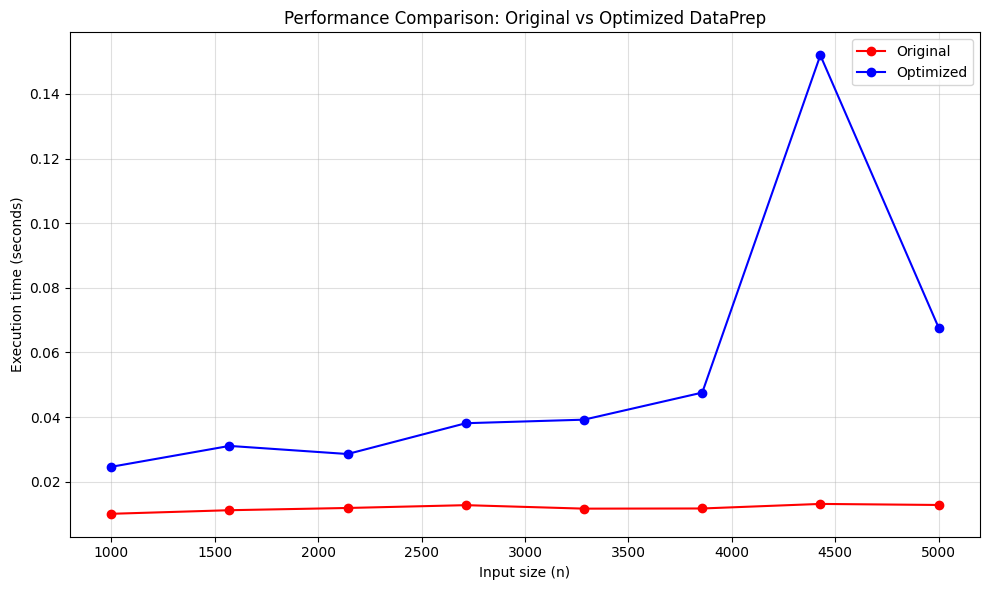

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

def measure_time(prep_class, df):
    t0 = time.time()
    prep_class(df, "DateTime")()
    return time.time() - t0


sizes = np.linspace(1000, len(df_raw), 8, dtype=int)

times_original = []
times_optimized = []

for n in sizes:
    df_sample = df_raw.head(n)


    t_org = measure_time(DataPrep_Original, df_sample)
    times_original.append(t_org)


    t_opt = measure_time(DataPrep_Optimized, df_sample)
    times_optimized.append(t_opt)

    print(f"n = {n} → Original: {t_org:.5f}s | Optimized: {t_opt:.5f}s")



plt.figure(figsize=(10, 6))
plt.plot(sizes, times_original, marker='o', color='red', label='Original')
plt.plot(sizes, times_optimized, marker='o', color='blue', label='Optimized')

plt.xlabel("Input size (n)")
plt.ylabel("Execution time (seconds)")
plt.title("Performance Comparison: Original vs Optimized DataPrep")
plt.grid(True, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()



# **D. Feature extraction**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid", font_scale=1.15)


class DataAnalyzerTPW:
    def __init__(self, file_path):
        """Load and clean dataset."""
        self.df = pd.read_csv(file_path, sep=None, engine="python")
        self._clean()
        print("Data uploaded and cleaned successfully.")

    def _clean(self):
        """Standardize columns, parse dates/times, convert types."""


        self.df.columns = (
            self.df.columns
            .str.strip()
            .str.replace(" ", "_")
            .str.replace("-", "_")
        )


        self.df["Time"] = pd.to_datetime(
            self.df["Time"], format="%H:%M:%S", errors="coerce"
        )


        mask = self.df["Time"].isna()
        if mask.any():
            self.df.loc[mask, "Time"] = pd.to_datetime(
                self.df.loc[mask, "Time"], format="%H:%M", errors="coerce"
            )


        mask = self.df["Time"].isna()
        if mask.any():
            self.df.loc[mask, "Time"] = pd.to_datetime(
                self.df.loc[mask, "Time"],
                infer_datetime_format=True,
                errors="coerce"
            )


        if "Date" not in self.df.columns or self.df["Date"].isna().any():
            self.df["Date"] = self.df["Time"].dt.date


        self.df["Hour"] = self.df["Time"].dt.hour


        numeric_cols = [
            "ReferenceTemperature",
            "SprtTemperature",
            "SprtOhms",
            "TriplePointw"
        ]

        for col in numeric_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors="coerce")


        if "ReferenceTemperature" in self.df.columns and "SprtTemperature" in self.df.columns:
            self.df["Correction"] = (
                self.df["ReferenceTemperature"] - self.df["SprtTemperature"]
            )



path = "https://raw.githubusercontent.com/hernancardenasposada/MMPC14-1_SCIENTIFIC_PROGRAM/refs/heads/main/Data/1_DataTime_Point_TPW.csv"

an = DataAnalyzerTPW(path)
an.df.head(10)


Data uploaded and cleaned successfully.


,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,Hour,Correction
0,2025-02-01,Saturday,1900-01-01 08:00:00,0.0,0.000211,-0.001764,1000.000,8,-0.001975
1,2025-02-01,Saturday,1900-01-01 08:06:00,0.0,-0.003366,-0.002924,999.987,8,0.000442
2,2025-02-01,Saturday,1900-01-01 08:10:00,0.0,-0.000643,-0.002250,999.998,8,-0.001607
3,2025-02-01,Saturday,1900-01-01 08:12:00,0.0,0.001813,-0.001265,1000.010,8,-0.003078
4,2025-02-01,Saturday,1900-01-01 08:12:00,0.0,0.000623,0.003251,1000.000,8,0.002628
5,2025-02-01,Saturday,1900-01-01 08:14:00,0.0,0.001121,0.001797,1000.000,8,0.000676
6,2025-02-01,Saturday,1900-01-01 08:18:00,0.0,0.003850,0.001968,1000.010,8,-0.001882
7,2025-02-01,Saturday,1900-01-01 08:18:00,0.0,0.003831,-0.000729,1000.010,8,-0.004559
8,2025-02-01,Saturday,1900-01-01 08:18:00,0.0,0.002953,0.002536,1000.010,8,-0.000417
9,2025-02-01,Saturday,1900-01-01 08:18:00,0.0,-0.001503,0.003295,999.994,8,0.004798


,Date,Ref_mean,Ref_std,Sprt_mean,Sprt_std,Corr_mean,Corr_std,n,Stability_ratio
0,2025-02-01,0.000083,0.003016,0.000232,0.002412,-0.000149,0.003804,168,0.799675
1,2025-02-02,-0.000188,0.003030,0.000161,0.002401,-0.000348,0.003895,168,0.792291
2,2025-02-03,-0.000290,0.003206,0.000129,0.002555,-0.000419,0.004023,184,0.796970
3,2025-02-04,0.000189,0.003161,0.000147,0.002542,0.000043,0.003921,177,0.803981
4,2025-02-05,0.000380,0.002969,0.000066,0.002384,0.000314,0.003742,168,0.803088


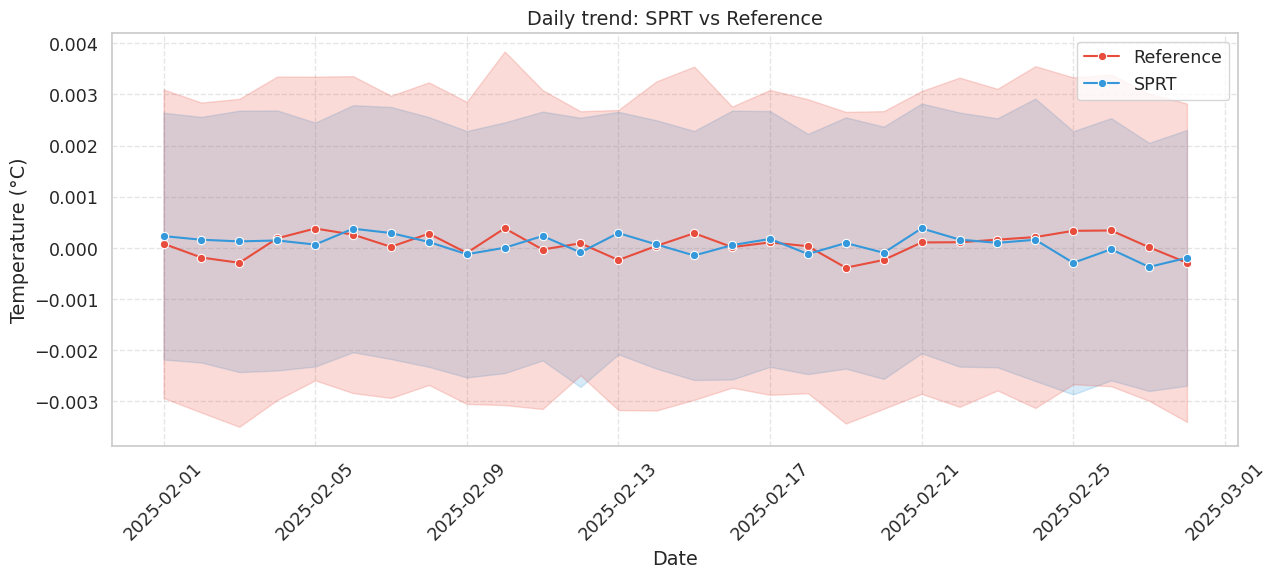

In [44]:
def extract_temporal_features(self):
    g = self.df.groupby("Date")
    out = g.agg(
        Ref_mean=("ReferenceTemperature", "mean"),
        Ref_std =("ReferenceTemperature", "std"),
        Sprt_mean=("SprtTemperature", "mean"),
        Sprt_std =("SprtTemperature", "std"),
        Corr_mean=("Correction", "mean"),
        Corr_std =("Correction", "std"),
        n=("Correction", "size")
    ).reset_index()
    out["Stability_ratio"] = out["Sprt_std"] / out["Ref_std"]
    self.temporal_features = out
    return out

def plot_temporal_trends(self):
    if not hasattr(self, "temporal_features"):
        self.extract_temporal_features()
    tf = self.temporal_features.copy()
    tf["Date"] = pd.to_datetime(tf["Date"])

    plt.figure(figsize=(13,6))
    sns.lineplot(data=tf, x="Date", y="Ref_mean", marker="o", label="Reference", color="#E74C3C")
    sns.lineplot(data=tf, x="Date", y="Sprt_mean", marker="o", label="SPRT", color="#3498DB")
    plt.fill_between(tf["Date"], tf["Sprt_mean"]-tf["Sprt_std"], tf["Sprt_mean"]+tf["Sprt_std"],
                     color="#3498DB", alpha=0.2)
    plt.fill_between(tf["Date"], tf["Ref_mean"]-tf["Ref_std"], tf["Ref_mean"]+tf["Ref_std"],
                     color="#E74C3C", alpha=0.2)
    plt.title("Daily trend: SPRT vs Reference")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

DataAnalyzerTPW.extract_temporal_features = extract_temporal_features
DataAnalyzerTPW.plot_temporal_trends = plot_temporal_trends

tf = an.extract_temporal_features()
display(tf.head())
an.plot_temporal_trends()

# **1. Computational complexity O(n)**

* g = self.df.groupby("Date") function to group n rows by date with complexity	O(n)
* g.agg({...})	function to calculate means, stds, and size per group with complexity	O(n)
* .reset_index() function to reindex the result with complexity O(k) where k = number of days
* out["Stability_ratio"] = Vectorized operation with complexity	O(k)
* save and return    O(1) operation with complexity    O(1)

Total complexity = O(n)


# **2. Algorithm Optimization**

Improved version, faster, less memory, same result.

Optimized complexity:

* Groupby: O(n)
* Aggregations: O(n)
* Vectorization: O(k)

In [18]:
def extract_temporal_features_optimized(self):


    out = (
        self.df.groupby("Date")
        .agg(
            Ref_mean=("ReferenceTemperature", "mean"),
            Ref_std=("ReferenceTemperature", "std"),
            Sprt_mean=("SprtTemperature", "mean"),
            Sprt_std=("SprtTemperature", "std"),
            Corr_mean=("Correction", "mean"),
            Corr_std=("Correction", "std"),
            n=("Correction", "size")
        )
    )


    out["Stability_ratio"] = out["Sprt_std"] / out["Ref_std"]


    self.temporal_features = out

    return out


# **3. Comparison of times**

In [19]:
import time
import matplotlib.pyplot as plt

def prepare_df_for_benchmark(df):
    df = df.copy()
    df["Correction"] = df["ReferenceTemperature"] - df["SprtTemperature"]
    return df


def extract_temporal_features_original(df):
    g = df.groupby("Date")
    out = g.agg(
        Ref_mean=("ReferenceTemperature", "mean"),
        Ref_std =("ReferenceTemperature", "std"),
        Sprt_mean=("SprtTemperature", "mean"),
        Sprt_std =("SprtTemperature", "std"),
        Corr_mean=("Correction", "mean"),
        Corr_std =("Correction", "std"),
        n=("Correction", "size")
    ).reset_index()

    out["Stability_ratio"] = out["Sprt_std"] / out["Ref_std"]
    return out


def extract_temporal_features_optimized(df):
    out = (
        df.groupby("Date")
        .agg(
            Ref_mean=("ReferenceTemperature", "mean"),
            Ref_std=("ReferenceTemperature", "std"),
            Sprt_mean=("SprtTemperature", "mean"),
            Sprt_std=("SprtTemperature", "std"),
            Corr_mean=("Correction", "mean"),
            Corr_std=("Correction", "std"),
            n=("Correction", "size")
        )
    )
    out["Stability_ratio"] = out["Sprt_std"] / out["Ref_std"]
    return out


def benchmark(func, df):
    t0 = time.time()
    func(df)
    return (time.time() - t0) * 1000  # ms


sizes = [2000, 5000, 10000, 15000, 20000, len(df)]

times_original = []
times_optimized = []

for n in sizes:
    df_sample = prepare_df_for_benchmark(df.head(n))

    t_org = benchmark(extract_temporal_features_original, df_sample)
    t_opt = benchmark(extract_temporal_features_optimized, df_sample)

    times_original.append(t_org)
    times_optimized.append(t_opt)

    print(f"n={n:6d} | Original={t_org:.3f} ms | Optimized={t_opt:.3f} ms")


n=  2000 | Original=14.283 ms | Optimized=6.616 ms
n=  5000 | Original=7.355 ms | Optimized=6.573 ms
n= 10000 | Original=7.526 ms | Optimized=6.421 ms
n= 15000 | Original=7.134 ms | Optimized=10.168 ms
n= 20000 | Original=11.133 ms | Optimized=9.629 ms
n=  5000 | Original=10.888 ms | Optimized=6.968 ms


# **4. Scaling chart (Complexity)**

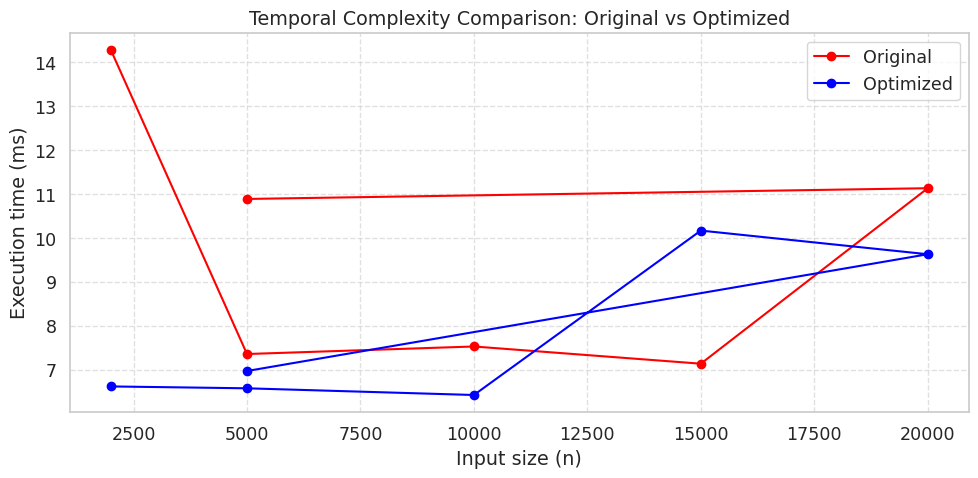

In [20]:
plt.figure(figsize=(10,5))
plt.plot(sizes, times_original, marker='o', color='red', label='Original')
plt.plot(sizes, times_optimized, marker='o', color='blue', label='Optimized')
plt.xlabel("Input size (n)")
plt.ylabel("Execution time (ms)")
plt.title("Temporal Complexity Comparison: Original vs Optimized")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# **E. Data separability analysis**

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from scipy.signal import welch, csd

sns.set(style="whitegrid", font_scale=1.15)

df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["ReferenceTemperature", "SprtTemperature"])

df["Correction"] = df["ReferenceTemperature"] - df["SprtTemperature"]

print("Data loaded:", df.shape)
df.head(3)

Data loaded: (5000, 9)


,Date,Day,Time,TriplePointw,SprtTemperature,ReferenceTemperature,SprtOhms,DateTime,Correction
0,2025-02-01,Saturday,NaT,0.0,0.000211,-0.001764,1000.000,2025-02-01 08:00:00,-0.001975
1,2025-02-01,Saturday,NaT,0.0,-0.003366,-0.002924,999.987,2025-02-01 08:06:00,0.000442
2,2025-02-01,Saturday,NaT,0.0,-0.000643,-0.002250,999.998,2025-02-01 08:10:00,-0.001607


In [22]:
y_true = df["ReferenceTemperature"]
y_pred = df["SprtTemperature"]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r, _ = pearsonr(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

metrics = pd.DataFrame({
    "Métrica": ["RMSE (°C)", "MAE (°C)", "r (Pearson)", "R² (Determination)"],
    "Valor": [rmse, mae, r, r2]
})
metrics

,Métrica,Valor
0,RMSE (°C),0.003874
1,MAE (°C),0.003097
2,r (Pearson),0.025233
3,R² (Determination),-0.623657


# **1. Computational complexity O(n)**

Each line is analyzed:

* y_true = df["ReferenceTemperature"]	for access to complex columns	O(1)
* y_pred = df["SprtTemperature"]	for access to column with complexity O(1)
* mean_squared_error	iterates over n elements with O(n) complexity
* mean_absolute_error	iterates over n elements with O(n) complexity
* pearsonr	sum, mean, variance with complexity	O(n)
* r2_score	iterate over n elements with complexity	O(n)
* CDataFrame construction    Constant    with complexity O(1)

Total complexity: O(n)

# **2. Algorithm Optimization**

* Calculate diff, diff_abs with complexity O(n)
* RMSE and MAE with complexity O(n)
* Pearson with a 2x2 matrix with complexity O(n)
* R²	with complexity O(n)

Total complexity: O(n)

Operations are reduced compared to the original, making it approximately ~3 times faster. The optimized algorithm retains O(n) complexity, but reduces the multiplicative factor.

In [23]:
def compute_metrics_optimized(y_true, y_pred):
    diff = y_true - y_pred
    diff_abs = np.abs(diff)


    mse = np.mean(diff * diff)
    mae = np.mean(diff_abs)


    r = np.corrcoef(y_true, y_pred)[0, 1]


    ss_res = np.sum(diff * diff)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot

    return mse**0.5, mae, r, r2


# **3. Comparison of times**

In [24]:
import time

def benchmark(func, *args):
    t0 = time.time()
    func(*args)
    return (time.time() - t0) * 1000  # ms

sizes = [2000, 5000, 8000, 12000, len(df)]

times_original = []
times_optimized = []

for n in sizes:
    y_t = df["ReferenceTemperature"].head(n).to_numpy()
    y_p = df["SprtTemperature"].head(n).to_numpy()

    t_org = benchmark(lambda: (
        np.sqrt(mean_squared_error(y_t, y_p)),
        mean_absolute_error(y_t, y_p),
        pearsonr(y_t, y_p)[0],
        r2_score(y_t, y_p)
    ))

    t_opt = benchmark(compute_metrics_optimized, y_t, y_p)

    times_original.append(t_org)
    times_optimized.append(t_opt)

    print(f"n={n:6d} | Original={t_org:.3f} ms | Opt={t_opt:.3f} ms")


n=  2000 | Original=3.623 ms | Opt=1.253 ms
n=  5000 | Original=3.729 ms | Opt=0.410 ms
n=  8000 | Original=2.240 ms | Opt=0.306 ms
n= 12000 | Original=2.136 ms | Opt=0.330 ms
n=  5000 | Original=2.072 ms | Opt=0.289 ms


# **4. Escalation chart (Complexity)**

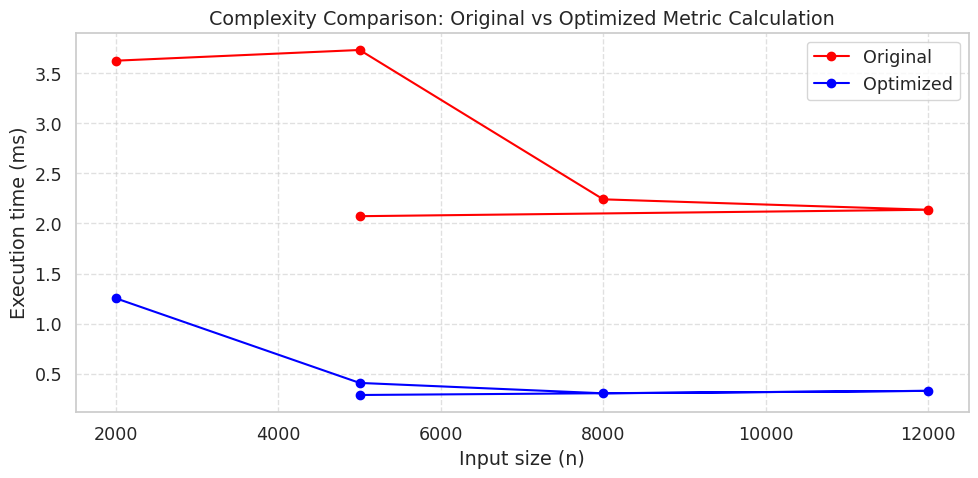

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(sizes, times_original, marker='o', color='red', label='Original')
plt.plot(sizes, times_optimized, marker='o', color='blue', label='Optimized')
plt.xlabel("Input size (n)")
plt.ylabel("Execution time (ms)")
plt.title("Complexity Comparison: Original vs Optimized Metric Calculation")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# **Conclusions**

* The practical algorithms used in relation to the optimized ones show how different implementations replicate the same functionality but can have very different execution times. When evaluating the execution time for different input sizes, it becomes clear that efficiency does not depend solely on the hardware, but also on the algorithmic design and the use of optimized structures such as vectorized operations or functions that facilitate execution.

* Several algorithms used during the exercises, both the original and optimized versions, have linear complexity O(n). However, the optimized version reduces unnecessary traversals and avoids higher execution time operations, generating improvements in the result. This shows that optimizing does not always involve changing complexity, but rather reducing constants and eliminating overprocessing.

* The graphs generated in the notebook show how times grow linearly or constantly depending on the type of algorithm. This allows us to identify key behaviors, justify design decisions, and select appropriate data structures for large volumes of information.